In [159]:
import random
import numpy as np
import time
import timeit
import pandas as pd
import matplotlib.pyplot as plt

# Задание 1

In [24]:
variant = 18

In [25]:
products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны']
prices = [20000, 3000, 45600, 5000]

In [26]:
np_products = np.array(products)
np_prices = np.array(prices)

In [27]:
# создаем словарь для итоговых результатов
total_income = {'classic_python':{product: 0 for product in products},
                "numpy":{product: 0 for product in products},
                "vector_numpy":{product: 0 for product in products}}
sales = {}
np_sales = {}

In [28]:
# генерируем продажи случайным образом
sales = [[random.randint(0, variant + 100) for i in range(100000)] for j in range(4)]
np_sales = np.array(sales)

In [30]:
# решение с использованием "классического" Python
start_time = time.time()

        
for count, product in enumerate(products):
    for i in sales[count]:
        total_income['classic_python'][product] += prices[count] * i
        
end_time = time.time()
classic_python_time = end_time - start_time

print(f'Классический python: {total_income["classic_python"]}')

Классический python: {'автомобиль HAVAL': 117805760000, 'обувь': 17682933000, 'одежда': 269212231200, 'телефоны': 29545335000}


In [31]:
# решение с использованием NumPy
start_time = time.time()
    
for count, product in enumerate(np_products):
    for i in np_sales[count]:
        total_income['numpy'][product] += np_prices[count] * i 

    
end_time = time.time()
numpy_time = end_time - start_time

print(f'NumPy: {total_income["numpy"]}')

NumPy: {'автомобиль HAVAL': 117805760000, 'обувь': 17682933000, 'одежда': 269212231200, 'телефоны': 29545335000}


In [32]:
# решение с использованием NumPy и векторизации 
# тут все равно пришлось использовать цикл, так как я все загоняю в словарь
start_time = time.time()
    
    
total_income['vector_numpy'] = {product: np.sum(np_sales[count] * np_prices[count]) for count, product in enumerate(np_products)}

    
end_time = time.time()
vector_time = end_time - start_time

print(f'NumPy и векторизация: {total_income["vector_numpy"]}')

NumPy и векторизация: {'автомобиль HAVAL': 117805760000, 'обувь': 17682933000, 'одежда': 269212231200, 'телефоны': 29545335000}


In [33]:
print(f'Время выполнения кода в классическом Python: {classic_python_time} секунд')
print(f'Время выполнения кода с использованием NumPy: {numpy_time} секунд')
print(f'Время выполнения кода с использованием NumPy и векторизации: {vector_time} секунд')

Время выполнения кода в классическом Python: 0.05576014518737793 секунд
Время выполнения кода с использованием NumPy: 0.09571290016174316 секунд
Время выполнения кода с использованием NumPy и векторизации: 0.0023670196533203125 секунд


# Задание 2

In [34]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)

In [35]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0

    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] < right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1

    result.extend(left[left_idx:])
    result.extend(right[right_idx:])

    return result

In [36]:
# пример
arr = np.array([12, 11, 13, 5, 6, 7])
sorted_arr = merge_sort(arr)
print(sorted_arr)

[5, 6, 7, 11, 12, 13]


In [37]:
# генерируем случайный массив
arr = np.random.rand(1000)

In [38]:
# время выполнения чистого Python
def python_sort():
    sorted_arr = sorted(arr)

python_time = timeit.timeit(python_sort, number=1000)

In [39]:
# время выполнения с использованием нашей реализации сортировки слиянием
def merge_sort_numpy():
    sorted_arr = merge_sort(arr)

merge_sort_numpy_time = timeit.timeit(merge_sort_numpy, number=1000)

In [40]:
# время выполнения с использованием numpy.sort()
def numpy_sort():
    sorted_arr = np.sort(arr)

numpy_sort_time = timeit.timeit(numpy_sort, number=1000)

In [41]:
print(f"Время выполнения чистого Python: {python_time:.4f} секунд")
print(f"Время выполнения с использованием нашей реализации: {merge_sort_numpy_time:.4f} секунд")
print(f"Время выполнения с использованием numpy.sort(): {numpy_sort_time:.4f} секунд")

Время выполнения чистого Python: 0.1722 секунд
Время выполнения с использованием нашей реализации: 1.2834 секунд
Время выполнения с использованием numpy.sort(): 0.0113 секунд


# Задание 3

In [46]:
alc_data = np.genfromtxt('drinks.csv', delimiter=',', skip_header=1, dtype=[('country', 'U20'), ('beer_servings', 'i4'), ('spirit_servings', 'i4'), ('wine_servings', 'i4'), ('total_litres_of_pure_alcohol', 'f8')])

In [50]:
country_max_beer = alc_data['country'][np.argmax(alc_data['beer_servings'])]
print(f"Больше всего пива потребляют в: {country_max_beer}")


country_max_wine = alc_data['country'][np.argmax(alc_data['wine_servings'])]
print(f"Больше всего вина потребляют в: {country_max_wine}")


country_max_liquor = alc_data['country'][np.argmax(alc_data['spirit_servings'])]
print(f"Больше всего ликера потребляют в: {country_max_liquor}")


Больше всего пива потребляют в: Namibia
Больше всего вина потребляют в: France
Больше всего ликера потребляют в: Grenada


# Задание 4

In [52]:
trn_data = np.genfromtxt('tarantino.csv', delimiter=',', skip_header=1, dtype=[('movie', 'U20'), ('type', 'U20'), ('word', 'U20'),  ('minutes_in', 'f8')])

In [103]:
# число ругательств, смертей и их отношение по фильмам
word_counts = {}
death_counts = {}

for i in trn_data:
    movie = i[0]
    word_type = i[1]

    if movie not in word_counts:
        word_counts[movie] = 0
        
    if movie not in death_counts:
        death_counts[movie] = 0
    
    if word_type == 'word':
        word_counts[movie] += 1
    else: death_counts[movie] += 1
        
print(f'Число ругательств: {word_counts} \n\nЧисло смертей: {death_counts}')

Число ругательств: {'Reservoir Dogs': 421, 'Pulp Fiction': 469, 'Kill Bill: Vol. 1': 57, 'Kill Bill: Vol. 2': 69, 'Inglorious Basterds': 58, 'Django Unchained': 262, 'Jackie Brown': 368} 

Число смертей: {'Reservoir Dogs': 10, 'Pulp Fiction': 7, 'Kill Bill: Vol. 1': 63, 'Kill Bill: Vol. 2': 11, 'Inglorious Basterds': 48, 'Django Unchained': 47, 'Jackie Brown': 4}


In [122]:
# отношение ругательств к смертям по фильмам
ratio = {}
for movie in word_counts:
    if death_counts[movie] != 0:
        ratio[movie] = round(word_counts[movie] / death_counts[movie])
    else:
        ratio[movie] = float('inf') 

In [150]:
print("Movies\t\t\t\tWords\tDeaths\tRatio")
print("----------------------------------------------------------")
for movie in word_counts:
    print(f"{movie:25}\t{word_counts[movie]:5}\t{death_counts[movie]:7}\t{round(ratio[movie]):3} words на одну death (≈)")


Movies				Words	Deaths	Ratio
----------------------------------------------------------
Reservoir Dogs           	  421	     10	 42 words на одну death (≈)
Pulp Fiction             	  469	      7	 67 words на одну death (≈)
Kill Bill: Vol. 1        	   57	     63	  1 words на одну death (≈)
Kill Bill: Vol. 2        	   69	     11	  6 words на одну death (≈)
Inglorious Basterds      	   58	     48	  1 words на одну death (≈)
Django Unchained         	  262	     47	  6 words на одну death (≈)
Jackie Brown             	  368	      4	 92 words на одну death (≈)


In [154]:
# частота употребления конкретных прокрятий
wordtype_counts = {}

for i in trn_data:
    wordtype = i[2]

    if wordtype not in wordtype_counts:
        wordtype_counts[wordtype] = 0
    else:
        wordtype_counts[wordtype] += 1
        
print(wordtype_counts)

{'dick': 13, 'dicks': 4, 'fucked': 24, 'fucking': 406, 'bullshit': 14, 'fuck': 212, 'shit': 220, 'motherfucker': 69, 'pussy': 10, 'fucks': 2, 'hell': 44, 'jap': 0, 'bastard': 9, 'goddamn': 112, 'motherfuckers': 14, 'asshole': 9, 'ass': 139, 'assholes': 4, 'n-word ': 178, 'asses': 3, 'bitch': 63, 'fuckup': 0, 'fucker': 7, 'shitty': 3, 'asshead': 0, 'damn': 36, '': 189, 'damned': 2, 'bitches': 8, 'wetback': 1, 'faggot': 0, 'cocksucker': 1, 'gook': 0, 'fuckers': 0, 'gooks': 1, 'motherfucking': 26, 'dickless': 0, 'chickenshit': 0, 'slope': 0, 'fuckhead': 0, 'merde': 0, 'shithead': 2, 'cunt': 1, 'cunts': 0, 'fuckface': 0, 'cockblockery': 0, 'japs': 1, 'jew (verb)': 0, 'bastards': 0, 'horeshit': 0, 'shitless': 0, 'shitting': 0, 'negro ': 4, 'squaw': 0, 'slut': 0, 'goddamned': 0, 'jackass': 0, 'horseshit': 1, 'shittiest': 0, 'shitload': 1, 'dumbass': 0}


In [ ]:
# распределение времени между проклятиями

In [160]:
# словарь для хранения моментов времени проклятий по каждому фильму
curse_times = {}

for row in trn_data:
    if row[1] == "word": 
        if row[0] not in curse_times:
            curse_times[row[0]] = []
        curse_times[row[0]].append(row[3])

# отсортируем времена и вычислим интервалы между проклятиями
curse_intervals = {}

for movie, times in curse_times.items():
    times.sort()
    intervals = [times[i+1] - times[i] for i in range(len(times) - 1)]
    curse_intervals[movie] = intervals


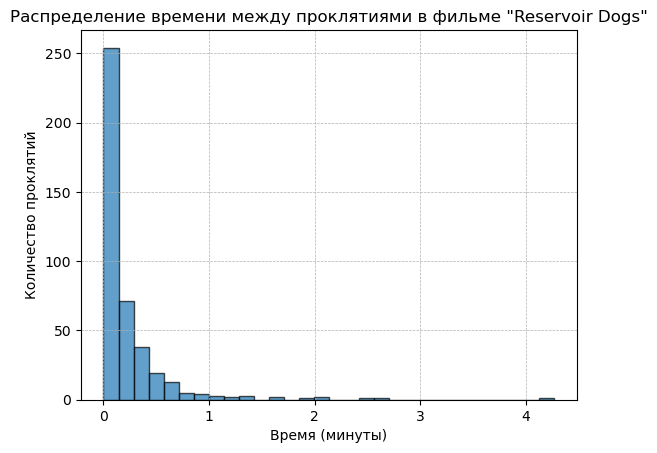

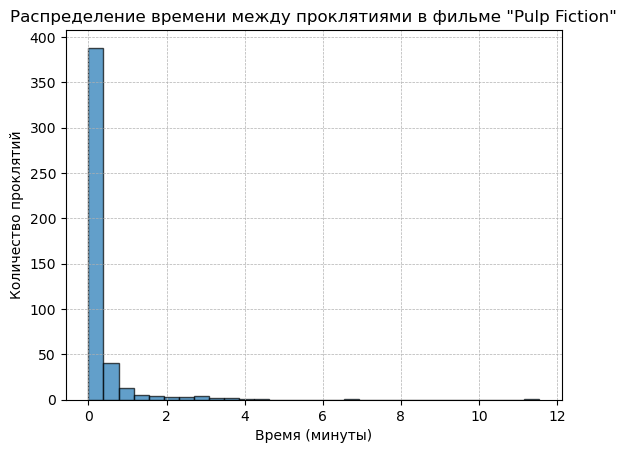

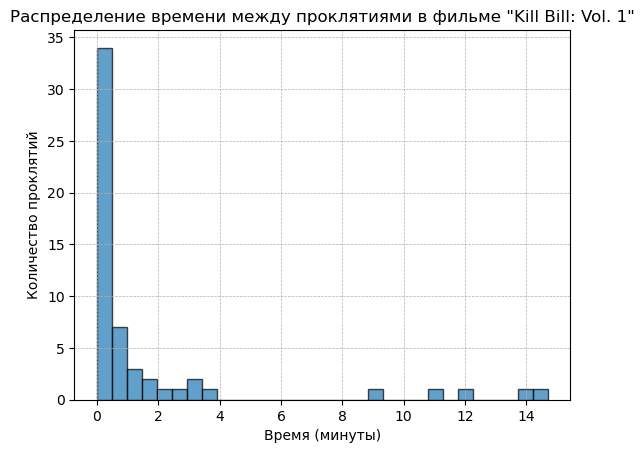

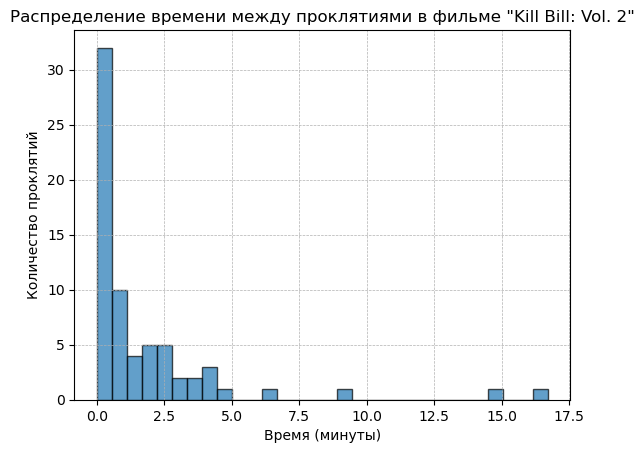

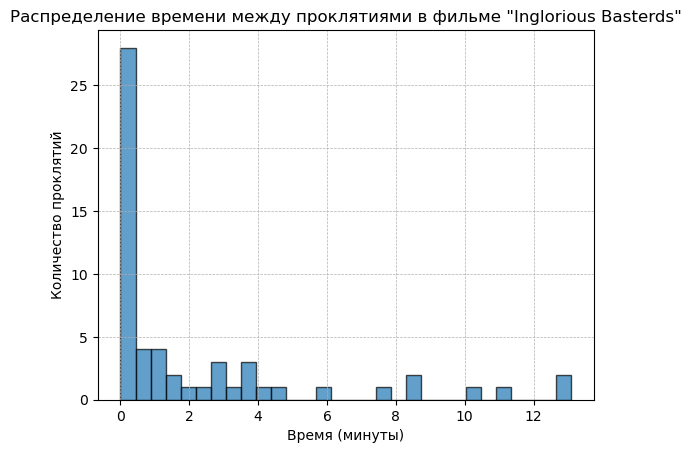

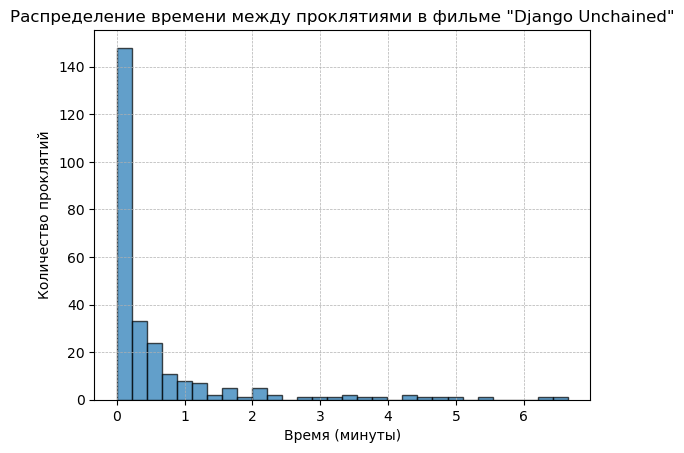

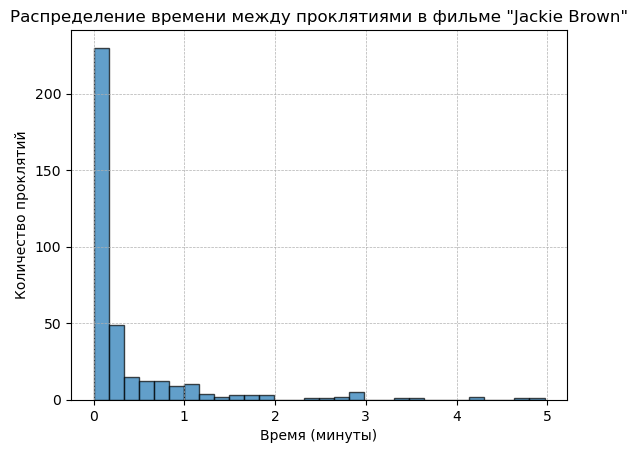

In [164]:
for movie, intervals in curse_intervals.items():
    plt.hist(intervals, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Распределение времени между проклятиями в фильме "{movie}"')
    plt.xlabel('Время (минуты)')
    plt.ylabel('Количество проклятий')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
